In [35]:
# Part 1 - Developing different Portfolios and Optimizing a Portfolio
# Initial imports
import os
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import hvplot.pandas
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

In [36]:
# Import stock data to dataframe
tickers_1 = ['TSLA', 'AMZN', 'SHOP', 'MU', 'F', 'AAPL', 'META', 'NVDA', 'AMD', 'GOOG']
tickers_2 = ['CVX', 'XOM', 'RY', 'TD', 'PFE', 'JNJ', 'NKE', 'MCD', 'WMT', 'COST']
tickers_3 = ['ENB', 'ATH.TO', 'NVA.TO', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'ATD.TO']
tickers_index = 'SPY'

start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021, 12, 31)
 
df_1 = pdr.get_data_yahoo(tickers_1, start, end)
df_2 = pdr.get_data_yahoo(tickers_2, start, end)
df_3 = pdr.get_data_yahoo(tickers_3, start, end)
df_index = pdr.get_data_yahoo(tickers_index, start, end)


In [39]:
# Function to clean df (drop columns, delete null values)
def clean_df(df):
    if 'Open' in df.columns:
        df = df.drop(['Open','High','Low','Volume','Adj Close'],axis=1) #drop unwanted columns
        df = df.dropna().copy() #drop null values
        print(f"Number of Null Values: {df.isnull().sum().sum()}") #check for null values and print
    return df #return df to variable

In [40]:
# verify the data frame
df_1 = clean_df(df_1)
df_1

Number of Null Values: 0


Attributes        Close                                                \
Symbols            TSLA        AMZN        SHOP         MU          F   
Date                                                                    
2017-01-03    43.397999   37.683498    4.282000  22.549999  12.590000   
2017-01-04    45.397999   37.859001    4.414000  22.360001  13.170000   
2017-01-05    45.349998   39.022499    4.768000  22.110001  12.770000   
2017-01-06    45.801998   39.799500    4.690000  22.040001  12.760000   
2017-01-09    46.256001   39.846001    4.718000  22.340000  12.630000   
...                 ...         ...         ...        ...        ...   
2021-12-27  1093.939941  169.669495  140.059006  94.430000  20.799999   
2021-12-28  1088.469971  170.660995  137.561996  92.940002  20.760000   
2021-12-29  1086.189941  169.201004  139.207993  96.169998  20.559999   
2021-12-30  1070.339966  168.644501  139.824005  93.889999  20.469999   
2021-12-31  1056.780029  166.716995  137.738998  93.150002  20.770000   

Attributes                                                              
Symbols           AAPL        META        NVDA         AMD        GOOG  
Date                                                                    
2017-01-03   29.037500  116.860001   25.502501   11.430000   39.306999  
2017-01-04   29.004999  118.690002   26.097500   11.430000   39.345001  
2017-01-05   29.152500  120.669998   25.434999   11.240000   39.701000  
2017-01-06   29.477501  123.410004   25.775000   11.320000   40.307499  
2017-01-09   29.747499  124.900002   26.820000   11.490000   40.332500  
...                ...         ...         ...         ...         ...  
2021-12-27  180.330002  346.179993  309.450012  154.360001  148.063995  
2021-12-28  179.289993  346.220001  303.220001  153.149994  146.447998  
2021-12-29  179.380005  342.940002  300.010010  148.259995  146.504501  
2021-12-30  178.199997  344.359985  295.859985  145.149994  146.002502  
2021-12-31  177.570007  336.350006  294.109985  143.899994  144.679504  

[1259 rows x 10 columns]

In [41]:
# verify the data frame
df_2 = clean_df(df_2)
df_2

Number of Null Values: 0


Attributes       Close                                               \
Symbols            CVX        XOM          RY         TD        PFE   
Date                                                                  
2017-01-03  117.849998  90.889999   68.139999  49.790001  31.309298   
2017-01-04  117.820000  89.889999   69.769997  50.840000  31.584440   
2017-01-05  117.309998  88.550003   70.080002  51.220001  31.888046   
2017-01-06  116.839996  88.500000   70.070000  50.869999  31.764706   
2017-01-09  115.839996  87.040001   69.940002  50.660000  31.755219   
...                ...        ...         ...        ...        ...   
2021-12-27  118.790001  61.889999  105.589996  76.470001  59.200001   
2021-12-28  118.559998  61.689999  105.730003  76.500000  58.009998   
2021-12-29  117.949997  61.150002  105.290001  76.190002  57.580002   
2021-12-30  117.430000  60.790001  105.489998  76.300003  58.400002   
2021-12-31  117.349998  61.189999  106.139999  76.680000  59.049999   

Attributes                                                              
Symbols            JNJ         NKE         MCD         WMT        COST  
Date                                                                    
2017-01-03  115.839996   51.980000  119.620003   68.660004  159.729996  
2017-01-04  115.650002   53.070000  119.480003   69.059998  159.759995  
2017-01-05  116.860001   53.060001  119.699997   69.209999  162.910004  
2017-01-06  116.300003   53.910000  120.760002   68.260002  162.830002  
2017-01-09  116.279999   53.380001  120.430000   68.709999  160.970001  
...                ...         ...         ...         ...         ...  
2021-12-27  169.669998  167.580002  268.239990  140.759995  563.469971  
2021-12-28  170.350006  166.419998  267.880005  142.779999  564.640015  
2021-12-29  171.550003  168.779999  268.489990  142.710007  567.770020  
2021-12-30  172.309998  167.490005  267.209991  143.169998  563.909973  
2021-12-31  171.070007  166.669998  268.070007  144.690002  567.700012  

[1259 rows x 10 columns]

In [42]:
# verify the data frame
df_3 = clean_df(df_3)
df_3

Number of Null Values: 0


Attributes      Close                                                 \
Symbols           ENB ATH.TO NVA.TO        TVE        CNR         CP   
Date                                                                   
2017-01-03  42.540001   2.05   6.86  24.700001  16.049999  28.285999   
2017-01-04  42.840000   2.05   7.02  24.650000  16.100000  29.190001   
2017-01-05  43.340000   2.00   6.90  24.700001  15.650000  29.431999   
2017-01-06  43.610001   2.00   6.87  24.650000  15.900000  29.728001   
2017-01-09  43.450001   1.90   6.73  24.650000  15.500000  29.098000   
...               ...    ...    ...        ...        ...        ...   
2021-12-22  37.610001   1.18   6.81  25.629999  16.139999  71.769997   
2021-12-23  38.000000   1.19   6.90  25.469999  16.430000  71.250000   
2021-12-29  38.389999   1.19   7.21  25.780001  17.450001  72.029999   
2021-12-30  38.650002   1.20   6.98  25.580000  17.219999  71.589996   
2021-12-31  39.080002   1.19   6.96  25.920000  17.440001  71.940002   

Attributes                                               
Symbols           BNS         TRI        BCE     ATD.TO  
Date                                                     
2017-01-03  56.380001   43.860001  43.470001  31.250000  
2017-01-04  57.439999   44.349998  44.080002  31.525000  
2017-01-05  57.790001   44.730000  44.500000  31.805000  
2017-01-06  57.880001   44.820000  44.259998  31.615000  
2017-01-09  57.689999   44.560001  43.790001  31.799999  
...               ...         ...        ...        ...  
2021-12-22  69.099998  116.599998  51.279999  51.580002  
2021-12-23  69.790001  116.860001  51.299999  52.680000  
2021-12-29  71.370003  118.629997  51.520000  53.000000  
2021-12-30  71.730003  118.629997  51.700001  53.480000  
2021-12-31  71.690002  119.620003  52.040001  53.000000  

[1233 rows x 10 columns]

In [43]:
# Create a new dataframe for SPY
df_index = clean_df(df_index)
df_index.columns = ['SPY']

Number of Null Values: 0


In [44]:
df_index

,SPY
Date,
2017-01-03,225.240005
2017-01-04,226.580002
2017-01-05,226.399994
2017-01-06,227.210007
2017-01-09,226.460007
...,...
2021-12-27,477.260010
2021-12-28,476.869995
2021-12-29,477.480011


In [45]:
#function to calculate daily returns of portfolio
def daily_returns(df):
    daily_returns = df.pct_change()
    daily_returns = daily_returns.dropna().copy()
    print(f"Number of Null Values: {daily_returns.isnull().sum().sum()}") #check for null values and print
    return daily_returns

In [46]:
# Calculate daily returns of the Portfolio
daily_returns_1 = daily_returns(df_1)
daily_returns_1.head()

Number of Null Values: 0


Attributes     Close                                                    \
Symbols         TSLA      AMZN      SHOP        MU         F      AAPL   
Date                                                                     
2017-01-04  0.046085  0.004657  0.030827 -0.008426  0.046068 -0.001119   
2017-01-05 -0.001057  0.030732  0.080199 -0.011181 -0.030372  0.005085   
2017-01-06  0.009967  0.019912 -0.016359 -0.003166 -0.000783  0.011148   
2017-01-09  0.009912  0.001168  0.005970  0.013612 -0.010188  0.009159   
2017-01-10 -0.006097 -0.001280  0.014625  0.006267  0.017419  0.001009   

Attributes                                          
Symbols         META      NVDA       AMD      GOOG  
Date                                                
2017-01-04  0.015660  0.023331  0.000000  0.000967  
2017-01-05  0.016682 -0.025386 -0.016623  0.009048  
2017-01-06  0.022707  0.013367  0.007117  0.015277  
2017-01-09  0.012074  0.040543  0.015018  0.000620  
2017-01-10 -0.004404 -0.007550 -0.004352 -0.002306

In [47]:
daily_returns_2 = daily_returns(df_2)
daily_returns_2.head()

Number of Null Values: 0


Attributes     Close                                                    \
Symbols          CVX       XOM        RY        TD       PFE       JNJ   
Date                                                                     
2017-01-04 -0.000255 -0.011002  0.023921  0.021089  0.008788 -0.001640   
2017-01-05 -0.004329 -0.014907  0.004443  0.007474  0.009613  0.010463   
2017-01-06 -0.004006 -0.000565 -0.000143 -0.006833 -0.003868 -0.004792   
2017-01-09 -0.008559 -0.016497 -0.001855 -0.004128 -0.000299 -0.000172   
2017-01-10 -0.007597 -0.012753  0.005290  0.001579 -0.000896 -0.001032   

Attributes                                          
Symbols          NKE       MCD       WMT      COST  
Date                                                
2017-01-04  0.020970 -0.001170  0.005826  0.000188  
2017-01-05 -0.000188  0.001841  0.002172  0.019717  
2017-01-06  0.016020  0.008856 -0.013726 -0.000491  
2017-01-09 -0.009831 -0.002733  0.006592 -0.011423  
2017-01-10 -0.005058 -0.001495 -0.006986  0.004287

In [48]:
daily_returns_3 = daily_returns(df_3)
daily_returns_3.head()

Number of Null Values: 0


Attributes     Close                                                    \
Symbols          ENB    ATH.TO    NVA.TO       TVE       CNR        CP   
Date                                                                     
2017-01-04  0.007052  0.000000  0.023324 -0.002024  0.003115  0.031959   
2017-01-05  0.011671 -0.024390 -0.017094  0.002028 -0.027950  0.008290   
2017-01-06  0.006230  0.000000 -0.004348 -0.002024  0.015974  0.010057   
2017-01-09 -0.003669 -0.050000 -0.020378  0.000000 -0.025157 -0.021192   
2017-01-10 -0.014499 -0.005263 -0.017831  0.002434  0.029032  0.005499   

Attributes                                          
Symbols          BNS       TRI       BCE    ATD.TO  
Date                                                
2017-01-04  0.018801  0.011172  0.014033  0.008800  
2017-01-05  0.006093  0.008568  0.009528  0.008882  
2017-01-06  0.001557  0.002012 -0.005393 -0.005974  
2017-01-09 -0.003283 -0.005801 -0.010619  0.005852  
2017-01-10  0.008494  0.001122  0.000913 -0.009434

In [49]:
daily_returns_index = daily_returns(df_index)
daily_returns_index.head()

Number of Null Values: 0


,SPY
Date,
2017-01-04,0.005949
2017-01-05,-0.000794
2017-01-06,0.003578
2017-01-09,-0.003301
2017-01-10,0.000000


In [50]:
# Calculate weighted returns for your portfolio, assuming equal number of shares per stock.
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

def dot_product(daily):
    daily = daily.dot(weights)
    return daily

In [51]:
daily_returns_1 = dot_product(daily_returns_1)
daily_returns_2 = dot_product(daily_returns_2)
daily_returns_3 = dot_product(daily_returns_3)

In [52]:
daily_returns_1

Date
2017-01-04    0.015805
2017-01-05    0.005713
2017-01-06    0.007919
2017-01-09    0.009789
2017-01-10    0.001333
                ...   
2021-12-27    0.017957
2021-12-28   -0.007922
2021-12-29   -0.002467
2021-12-30   -0.008222
2021-12-31   -0.008262
Length: 1258, dtype: float64

In [54]:
daily_returns_2

Date
2017-01-04    0.006671
2017-01-05    0.003630
2017-01-06   -0.000955
2017-01-09   -0.004890
2017-01-10   -0.002466
                ...   
2021-12-27    0.013445
2021-12-28   -0.001138
2021-12-29   -0.000097
2021-12-30   -0.000427
2021-12-31    0.003664
Length: 1258, dtype: float64

In [56]:
daily_returns_3

Date
2017-01-04    0.011623
2017-01-05   -0.001437
2017-01-06    0.001809
2017-01-09   -0.013425
2017-01-10    0.000047
                ...   
2021-12-22    0.010712
2021-12-23    0.007047
2021-12-29    0.018854
2021-12-30   -0.002618
2021-12-31    0.003627
Length: 1232, dtype: float64

In [57]:
# Combine the 4 portfolios to one dataframe
combined_df = pd.concat([daily_returns_1, daily_returns_2, daily_returns_3, daily_returns_index], axis="columns", join="inner")

In [58]:
combined_df

,0,1,2,SPY
Date,,,,
2017-01-04,0.015805,0.006671,0.011623,0.005949
2017-01-05,0.005713,0.003630,-0.001437,-0.000794
2017-01-06,0.007919,-0.000955,0.001809,0.003578
2017-01-09,0.009789,-0.004890,-0.013425,-0.003301
2017-01-10,0.001333,-0.002466,0.000047,0.000000
...,...,...,...,...
2021-12-22,0.014482,0.005993,0.010712,0.009999
2021-12-23,0.019051,0.001533,0.007047,0.006222
2021-12-29,-0.002467,-0.000097,0.018854,0.001279


In [59]:
# Rename the Columns
combined_df.columns = ['Portfolio 1','Portfolio 2','Portfolio 3','S&P Index']

In [60]:
combined_df

,Portfolio 1,Portfolio 2,Portfolio 3,S&P Index
Date,,,,
2017-01-04,0.015805,0.006671,0.011623,0.005949
2017-01-05,0.005713,0.003630,-0.001437,-0.000794
2017-01-06,0.007919,-0.000955,0.001809,0.003578
2017-01-09,0.009789,-0.004890,-0.013425,-0.003301
2017-01-10,0.001333,-0.002466,0.000047,0.000000
...,...,...,...,...
2021-12-22,0.014482,0.005993,0.010712,0.009999
2021-12-23,0.019051,0.001533,0.007047,0.006222
2021-12-29,-0.002467,-0.000097,0.018854,0.001279


<AxesSubplot:xlabel='Date'>

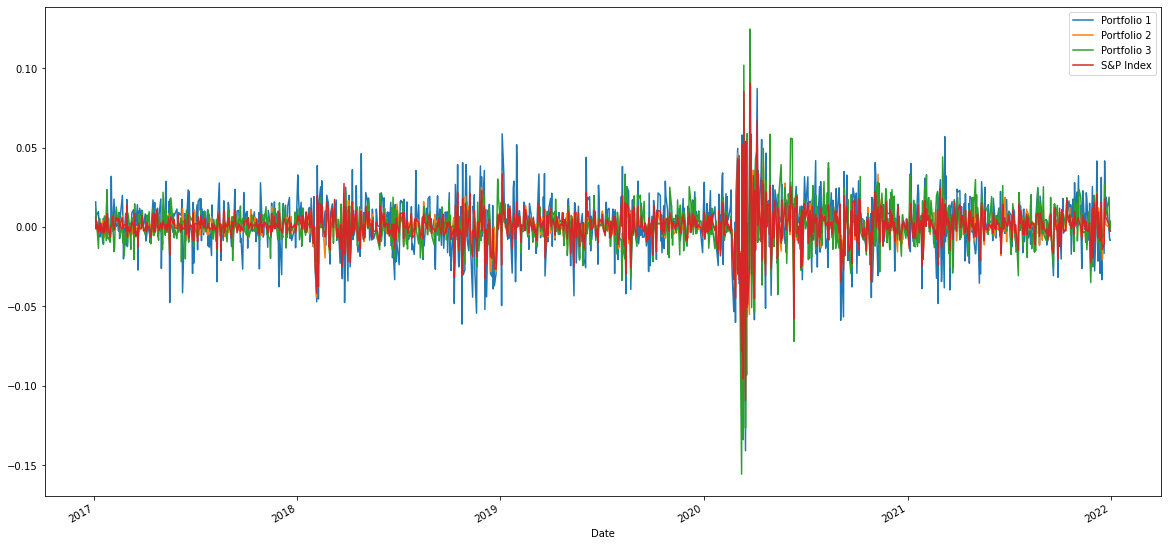

In [61]:
# Quantitative Analysis

# Performance analysis

# Plot daily returns of all portfolios

combined_df.plot(figsize=(20,10))

In [62]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns

,Portfolio 1,Portfolio 2,Portfolio 3,S&P Index
Date,,,,
2017-01-04,1.015805,1.006671,1.011623,1.005949
2017-01-05,1.021608,1.010325,1.010169,1.005150
2017-01-06,1.029698,1.009361,1.011997,1.008746
2017-01-09,1.039778,1.004424,0.998411,1.005416
2017-01-10,1.041164,1.001948,0.998458,1.005416
...,...,...,...,...
2021-12-22,7.359351,1.695158,1.674181,1.843207
2021-12-23,7.499553,1.697756,1.685979,1.854676
2021-12-29,7.481055,1.697591,1.717766,1.857048


<AxesSubplot:xlabel='Date'>

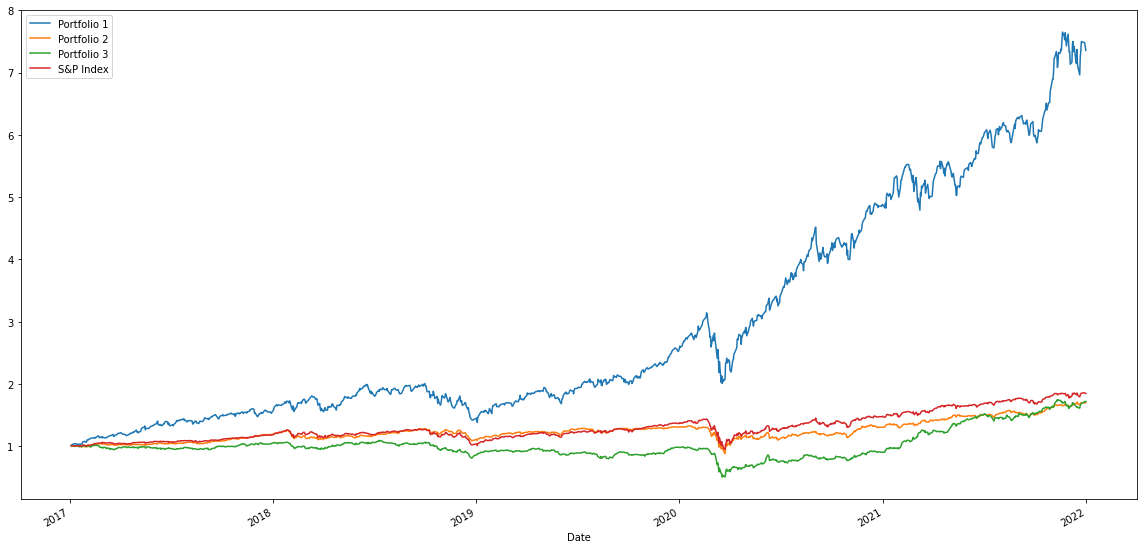

In [63]:
# Plot cumulative returns of all portfolios
cumulative_returns.plot(figsize=(20,10))

In [ ]:
# The Cumulative return shows Portfolio generated maximum returns for the 5 year timefram.

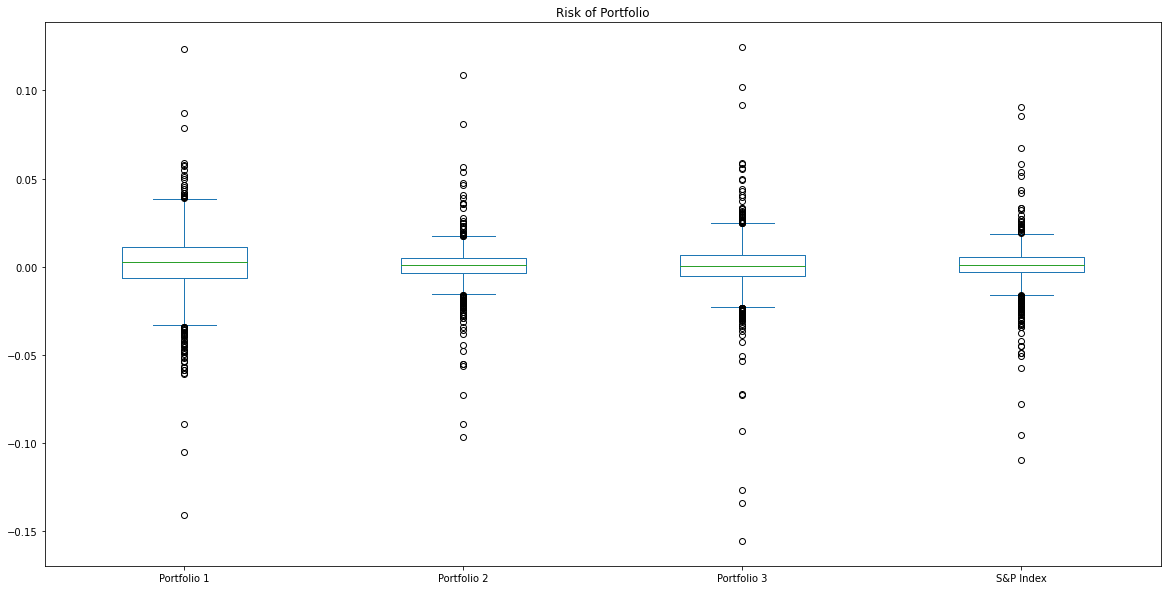

In [64]:
# Box plot of each portfolio to visually show risk

combined_df.plot(kind='box', figsize=(20,10), title='Risk of Portfolio')
plt.show()

In [65]:
# Calculate the daily standard deviations of all portfolios

std_dev = combined_df.std()
std_dev

Portfolio 1    0.018388
Portfolio 2    0.010964
Portfolio 3    0.015338
S&P Index      0.011878
dtype: float64

In [60]:
# The Standard deviation shows Portfolio 2 is least risky and less riskier than than the overall market (S&P Index)

In [66]:
# Calculate the annualized standard deviations of all portfolios
annualized_std_dev = (std_dev*np.sqrt(252))
annualized_std_dev

Portfolio 1    0.291903
Portfolio 2    0.174048
Portfolio 3    0.243486
S&P Index      0.188553
dtype: float64

In [67]:
# Rolling Statistics

# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_21day_std_dev = combined_df.rolling(window=21).std()
combined_21day_std_dev

,Portfolio 1,Portfolio 2,Portfolio 3,S&P Index
Date,,,,
2017-01-04,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-12-22,0.023205,0.009015,0.015113,0.012949
2021-12-23,0.023554,0.008811,0.015033,0.013016
2021-12-29,0.023309,0.008791,0.015578,0.013007


<AxesSubplot:xlabel='Date'>

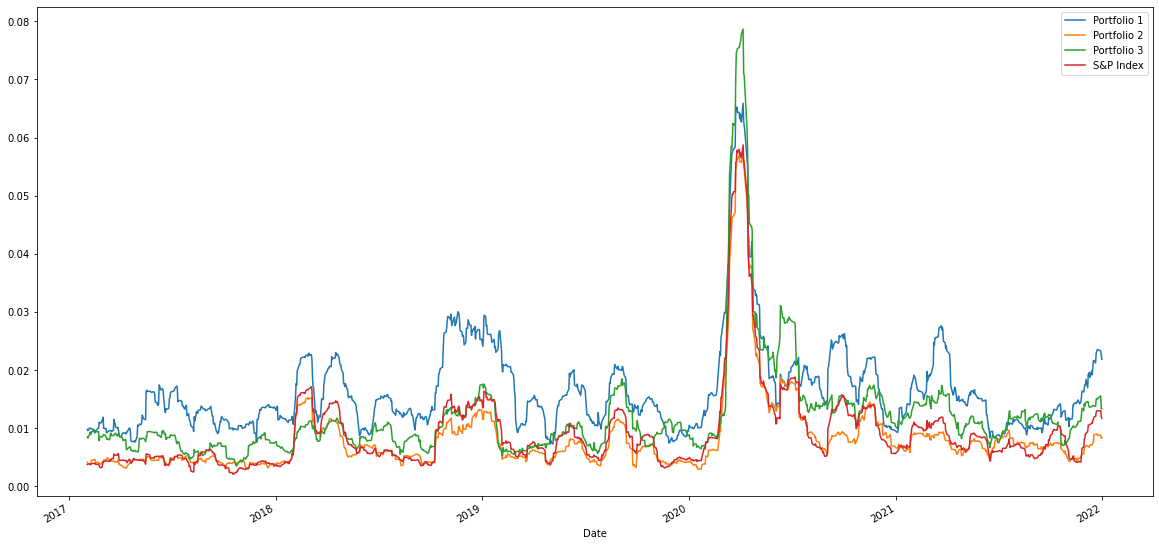

In [68]:
# Plot the rolling standard deviation

combined_21day_std_dev.plot(figsize=(20,10))

In [69]:
# Calculate the correlation

correlation = combined_df.corr()
correlation

,Portfolio 1,Portfolio 2,Portfolio 3,S&P Index
Portfolio 1,1.000000,0.628566,0.561057,0.821814
Portfolio 2,0.628566,1.000000,0.759690,0.901060
Portfolio 3,0.561057,0.759690,1.000000,0.730954
S&P Index,0.821814,0.901060,0.730954,1.000000


<AxesSubplot:>

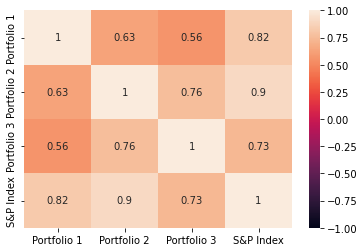

In [70]:
# Display the correlation matrix

import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [ ]:
# The corelation matrix shows that the portfolios are strongly correlated with the market.

In [71]:
# Calculate covariance of portfolios

portfolio_1_covar = combined_df["Portfolio 1"].cov(combined_df["S&P Index"])
portfolio_2_covar = combined_df["Portfolio 2"].cov(combined_df["S&P Index"])
portfolio_3_covar = combined_df["Portfolio 3"].cov(combined_df["S&P Index"])

In [72]:
# Calculate variance of S&P
variance = combined_df["S&P Index"].var()
variance

0.00014107975442479562

In [73]:
# Computing beta

portfolio_1_beta = portfolio_1_covar/variance
portfolio_2_beta = portfolio_2_covar/variance
portfolio_3_beta = portfolio_3_covar/variance

In [74]:
# Computing Rolling Beta
rolling_portfolio_1_covar = combined_df["Portfolio 1"].rolling(window=21).cov(combined_df["S&P Index"])
rolling_portfolio_2_covar = combined_df["Portfolio 2"].rolling(window=21).cov(combined_df["S&P Index"])
rolling_portfolio_3_covar = combined_df["Portfolio 3"].rolling(window=21).cov(combined_df["S&P Index"])

rolling_variance = combined_df["S&P Index"].rolling(window=21).var()

rolling_portfolio_1_beta = rolling_portfolio_1_covar / rolling_variance
rolling_portfolio_2_beta = rolling_portfolio_2_covar / rolling_variance
rolling_portfolio_3_beta = rolling_portfolio_3_covar / rolling_variance

In [75]:
# Combining the beta for all the portfolios in one dataframe
rolling_portfolio_combined_beta = pd.concat([rolling_portfolio_1_beta, rolling_portfolio_2_beta, rolling_portfolio_3_beta], axis="columns", join="inner")
rolling_portfolio_combined_beta

,0,1,2
Date,,,
2017-01-04,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN
...,...,...,...
2021-12-22,1.547380,0.551447,1.013591
2021-12-23,1.568802,0.544033,1.013531
2021-12-29,1.559592,0.542608,1.024348


In [76]:
# Renaming the columns
rolling_portfolio_combined_beta.columns = ['Portfolio 1','Portfolio 2','Portfolio 3']
rolling_portfolio_combined_beta

,Portfolio 1,Portfolio 2,Portfolio 3
Date,,,
2017-01-04,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN
...,...,...,...
2021-12-22,1.547380,0.551447,1.013591
2021-12-23,1.568802,0.544033,1.013531
2021-12-29,1.559592,0.542608,1.024348


In [77]:
# Plotting beta trend using hvplot
rolling_portfolio_combined_beta_plot = rolling_portfolio_combined_beta.hvplot.line(x="Date",y=["Portfolio 1","Portfolio 2","Portfolio 3"],label="Rolling 21 day Beta of portfolios").opts(yformatter='%.0f',xlabel='Date',ylabel='Beta',width = 800, height = 300)
rolling_portfolio_combined_beta_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
# The above hvplot for beta shows that the Portfolio 1 beta was much higher than the other 2 portfolios and the market.

In [78]:
# Use `ewm` to calculate the rolling window

combined_21expday_std_dev = combined_df.ewm(span=21, adjust=False).std()
combined_21expday_std_dev

,Portfolio 1,Portfolio 2,Portfolio 3,S&P Index
Date,,,,
2017-01-04,NaN,NaN,NaN,NaN
2017-01-05,0.007136,0.002151,0.009235,0.004768
2017-01-06,0.006216,0.004134,0.007926,0.003488
2017-01-09,0.005435,0.005811,0.012152,0.004729
2017-01-10,0.006885,0.005793,0.010898,0.004445
...,...,...,...,...
2021-12-22,0.023440,0.008784,0.013630,0.011960
2021-12-23,0.022921,0.008375,0.013105,0.011507
2021-12-29,0.021921,0.007999,0.013463,0.010972


<AxesSubplot:xlabel='Date'>

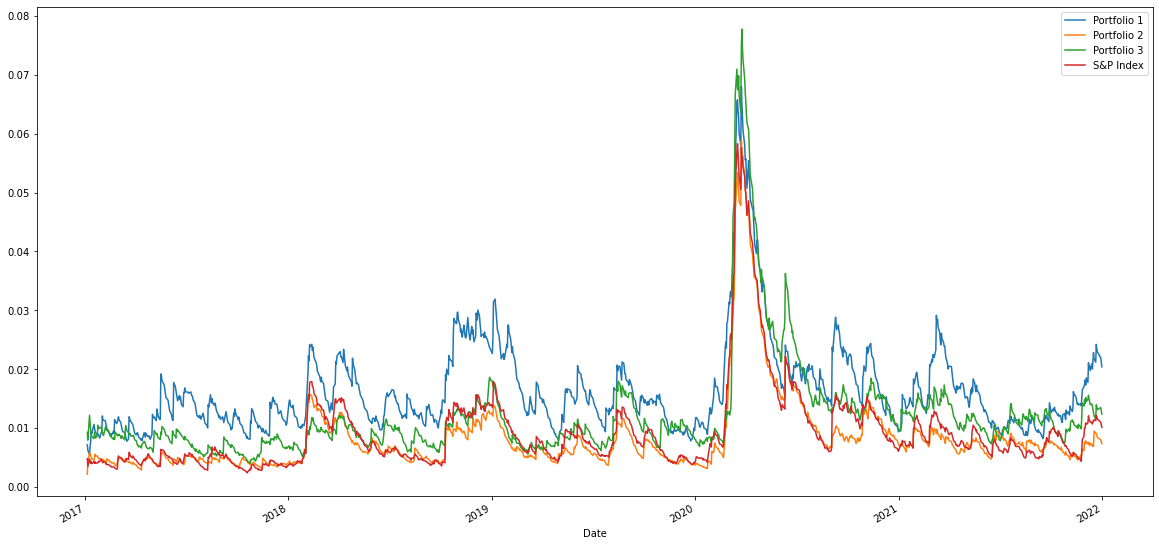

In [79]:
# Plotting std deviation using ewm
combined_21expday_std_dev.plot(figsize=(20,10))

In [80]:
# Sharpe Ratios

# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean()*252)/(combined_df.std()*np.sqrt(252))

In [81]:
# Viewing Sharper ratios of all the Portfolios
sharpe_ratios

Portfolio 1    1.546552
Portfolio 2    0.713142
Portfolio 3    0.578961
S&P Index      0.760839
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

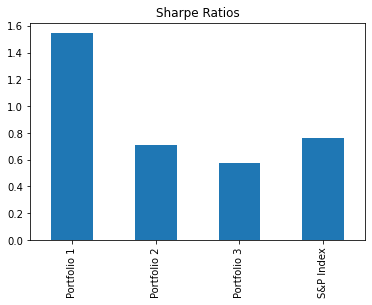

In [82]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [ ]:
# The Sharpe ratios shows that Portfolio 1 has highest Sharpe ratio and it can genereate maximum return given the risk of Portfolio.

In [83]:
# Portfolio Optimization(Portfolio 1) using Monte Carlo Simulation

#Fetch data from yahoo and save under DataFrame named 'data'
portfolio_1 = ['AAPL', 'AAL', 'AMZN', 'JPM', 'F', 'TWTR', 'META', 'NVDA', 'BAC', 'NOW']
portfolio_1_data = pdr.DataReader(portfolio_1,data_source="yahoo",start='01/01/2017',end='12/31/2021')['Close']

In [84]:
# View the data
portfolio_1_data

Symbols,AAPL,AAL,AMZN,JPM,F,TWTR,META,NVDA,BAC,NOW
Date,,,,,,,,,,
2017-01-03,29.037500,46.299999,37.683498,87.230003,12.590000,16.440001,116.860001,25.502501,22.530001,75.660004
2017-01-04,29.004999,46.700001,37.859001,86.910004,13.170000,16.860001,118.690002,26.097500,22.950001,78.830002
2017-01-05,29.152500,45.889999,39.022499,86.110001,12.770000,17.090000,120.669998,25.434999,22.680000,79.129997
2017-01-06,29.477501,46.209999,39.799500,86.120003,12.760000,17.170000,123.410004,25.775000,22.680000,82.099998
2017-01-09,29.747499,47.080002,39.846001,86.180000,12.630000,17.500000,124.900002,26.820000,22.549999,82.000000
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.330002,18.170000,169.669495,158.160004,20.799999,44.330002,346.179993,309.450012,44.639999,663.280029
2021-12-28,179.289993,18.540001,170.660995,158.639999,20.760000,43.430000,346.220001,303.220001,44.700001,654.000000
2021-12-29,179.380005,18.049999,169.201004,158.559998,20.559999,42.759998,342.940002,300.010010,44.630001,654.580017


In [85]:
#Compute stock returns and print the returns in percentage format
portfolio_ret = portfolio_1_data.pct_change()
portfolio_ret

Symbols,AAPL,AAL,AMZN,JPM,F,TWTR,META,NVDA,BAC,NOW
Date,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.008639,0.004657,-0.003668,0.046068,0.025547,0.015660,0.023331,0.018642,0.041898
2017-01-05,0.005085,-0.017345,0.030732,-0.009205,-0.030372,0.013642,0.016682,-0.025386,-0.011765,0.003806
2017-01-06,0.011148,0.006973,0.019912,0.000116,-0.000783,0.004681,0.022707,0.013367,0.000000,0.037533
2017-01-09,0.009159,0.018827,0.001168,0.000697,-0.010188,0.019220,0.012074,0.040543,-0.005732,-0.001218
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.022975,-0.004929,-0.008178,0.005723,0.027160,0.003850,0.032633,0.044028,0.004953,0.022681
2021-12-28,-0.005767,0.020363,0.005844,0.003035,-0.001923,-0.020302,0.000116,-0.020133,0.001344,-0.013991
2021-12-29,0.000502,-0.026429,-0.008555,-0.000504,-0.009634,-0.015427,-0.009474,-0.010586,-0.001566,0.000887


In [86]:
# Drop NA values
portfolio_ret = portfolio_ret.dropna()
portfolio_ret

Symbols,AAPL,AAL,AMZN,JPM,F,TWTR,META,NVDA,BAC,NOW
Date,,,,,,,,,,
2017-01-04,-0.001119,0.008639,0.004657,-0.003668,0.046068,0.025547,0.015660,0.023331,0.018642,0.041898
2017-01-05,0.005085,-0.017345,0.030732,-0.009205,-0.030372,0.013642,0.016682,-0.025386,-0.011765,0.003806
2017-01-06,0.011148,0.006973,0.019912,0.000116,-0.000783,0.004681,0.022707,0.013367,0.000000,0.037533
2017-01-09,0.009159,0.018827,0.001168,0.000697,-0.010188,0.019220,0.012074,0.040543,-0.005732,-0.001218
2017-01-10,0.001009,0.029737,-0.001280,0.002901,0.017419,-0.007429,-0.004404,-0.007550,0.017295,-0.004024
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.022975,-0.004929,-0.008178,0.005723,0.027160,0.003850,0.032633,0.044028,0.004953,0.022681
2021-12-28,-0.005767,0.020363,0.005844,0.003035,-0.001923,-0.020302,0.000116,-0.020133,0.001344,-0.013991
2021-12-29,0.000502,-0.026429,-0.008555,-0.000504,-0.009634,-0.015427,-0.009474,-0.010586,-0.001566,0.000887


In [87]:
# Calculate Cumulative returns
cumulative_returns = (1 + portfolio_ret).cumprod()
cumulative_returns

Symbols,AAPL,AAL,AMZN,JPM,F,TWTR,META,NVDA,BAC,NOW
Date,,,,,,,,,,
2017-01-04,0.998881,1.008639,1.004657,0.996332,1.046068,1.025547,1.015660,1.023331,1.018642,1.041898
2017-01-05,1.003960,0.991145,1.035533,0.987160,1.014297,1.039538,1.032603,0.997353,1.006658,1.045863
2017-01-06,1.015153,0.998056,1.056152,0.987275,1.013503,1.044404,1.056050,1.010685,1.006658,1.085118
2017-01-09,1.024451,1.016847,1.057386,0.987963,1.003177,1.064477,1.068800,1.051662,1.000888,1.083796
2017-01-10,1.025484,1.047084,1.056032,0.990829,1.020651,1.056569,1.064094,1.043721,1.018198,1.079434
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,6.210245,0.392441,4.502488,1.813138,1.652105,2.696472,2.962348,12.134105,1.981358,8.766587
2021-12-28,6.174429,0.400432,4.528799,1.818640,1.648928,2.641727,2.962690,11.889815,1.984021,8.643933
2021-12-29,6.177529,0.389849,4.490056,1.817723,1.633042,2.600973,2.934623,11.763945,1.980914,8.651599


In [88]:
#Calculate mean returns and covariances of portfolio 1
mean_returns = cumulative_returns.mean()
mean_returns

Symbols
AAPL    2.574747
AAL     0.676297
AMZN    2.769823
JPM     1.327185
F       0.836867
TWTR    2.233673
META    1.824918
NVDA    3.402935
BAC     1.338020
NOW     4.019113
dtype: float64

In [89]:
cov_matrix = cumulative_returns.cov()
print (cov_matrix)

Symbols      AAPL       AAL      AMZN       JPM         F      TWTR      META  \
Symbols                                                                         
AAPL     1.961043 -0.302696  1.551945  0.292021  0.112934  1.040181  0.754604   
AAL     -0.302696  0.082377 -0.278587 -0.030909  0.015949 -0.161348 -0.105606   
AMZN     1.551945 -0.278587  1.356419  0.223302  0.041698  0.913714  0.601579   
JPM      0.292021 -0.030909  0.223302  0.073137  0.035378  0.199357  0.122602   
F        0.112934  0.015949  0.041698  0.035378  0.053320  0.058973  0.054347   
TWTR     1.040181 -0.161348  0.913714  0.199357  0.058973  0.819635  0.432700   
META     0.754604 -0.105606  0.601579  0.122602  0.054347  0.432700  0.317796   
NVDA     3.380108 -0.435193  2.573623  0.540201  0.332778  1.716959  1.335984   
BAC      0.271479 -0.020529  0.200523  0.073221  0.043863  0.183039  0.118194   
NOW      3.190021 -0.550125  2.643573  0.478853  0.136877  1.813308  1.235539   

Symbols      NVDA       BAC

In [90]:
#Set the number of iterations to 500 and define an array to hold the simulation results; initially set to all zeros
num_iterations = 500
simulation_res = np.zeros((4+len(portfolio_1)-1,num_iterations))

In [91]:
# Run a loop to add random weights and test the optimization of portfolio
for i in range(num_iterations):

        weights = np.array(np.random.random(10))
        weights /= np.sum(weights)
        
        #Calculate the return and standard deviation for every step
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
        
        #Store all the results in a defined array
        simulation_res[0,i] = portfolio_return  
        simulation_res[1,i] = portfolio_std_dev
        
        #Calculate Sharpe ratio and store it in the array
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
        
        #Save the weights in the array
        for j in range(len(weights)):
                simulation_res[j+3,i] = weights[j]

In [92]:
# Create a new simulated dataframe
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',portfolio_1[0],portfolio_1[1],portfolio_1[2],portfolio_1[3],portfolio_1[4], portfolio_1[5], portfolio_1[6], portfolio_1[7], portfolio_1[8], portfolio_1[9]])
print (sim_frame.head())
print (sim_frame.tail())

        ret     stdev    sharpe      AAPL       AAL      AMZN       JPM  \
0  1.915580  0.835960  2.291473  0.068273  0.087165  0.021514  0.164453   
1  2.210308  0.970922  2.276503  0.005561  0.085858  0.124384  0.077300   
2  2.075414  0.785406  2.642474  0.036888  0.097526  0.183554  0.166800   
3  2.482646  1.194370  2.078624  0.035523  0.049175  0.143006  0.110306   
4  1.870747  0.699582  2.674092  0.158081  0.107500  0.079366  0.108257   

          F      TWTR      META      NVDA       BAC       NOW  
0  0.185346  0.069497  0.036248  0.161526  0.130920  0.075057  
1  0.161674  0.220828  0.050224  0.123857  0.020516  0.129797  
2  0.007000  0.197439  0.002689  0.054770  0.175915  0.077420  
3  0.077194  0.043686  0.130519  0.152738  0.052604  0.205249  
4  0.165614  0.199112  0.057375  0.035412  0.052172  0.037112  
          ret     stdev    sharpe      AAPL       AAL      AMZN       JPM  \
495  2.106935  0.849650  2.479769  0.178235  0.103552  0.191193  0.040462   
496  2.2068

In [93]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
max_sharpe

ret       1.415795
stdev     0.363479
sharpe    3.895125
AAPL      0.007438
AAL       0.250737
AMZN      0.053561
JPM       0.197360
F         0.251359
TWTR      0.161665
META      0.015352
NVDA      0.008845
BAC       0.010649
NOW       0.043034
Name: 10, dtype: float64

In [94]:
#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print ("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print ("The portfolio for min risk:\n", min_std)

The portfolio for max Sharpe Ratio:
 ret       1.415795
stdev     0.363479
sharpe    3.895125
AAPL      0.007438
AAL       0.250737
AMZN      0.053561
JPM       0.197360
F         0.251359
TWTR      0.161665
META      0.015352
NVDA      0.008845
BAC       0.010649
NOW       0.043034
Name: 10, dtype: float64
The portfolio for min risk:
 ret       1.415795
stdev     0.363479
sharpe    3.895125
AAPL      0.007438
AAL       0.250737
AMZN      0.053561
JPM       0.197360
F         0.251359
TWTR      0.161665
META      0.015352
NVDA      0.008845
BAC       0.010649
NOW       0.043034
Name: 10, dtype: float64


Text(0, 0.5, 'Returns')

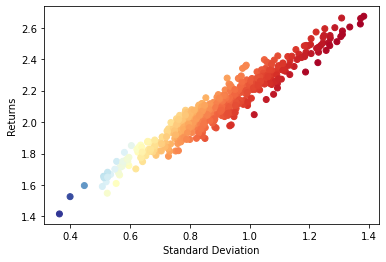

In [95]:
#Create a scatter plot using plotly coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')


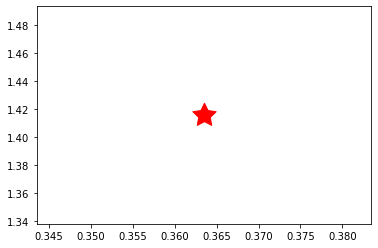

In [96]:
#Plot a red star using plotly to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)

In [116]:
# The above anlysis shows that the optimal portolio with max sharpe ratio would give a return of 142% over 5 years.

In [117]:
# Part 2 - Retirement planning using Monte Carlo Simulation of portfolio 1

In [97]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [98]:
#Loading dotenv to access ALPACA key and secret key

load_dotenv(dotenv_path='C:/Users/panka/Documents/June18th/.env.txt')

# Setting the Alpaca API key and ALPACA secret key variables to use ALPACA data
alpaca_api_key = os.getenv("ALPACA_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [99]:
#Displaying ALPACA Key
alpaca_api_key

'PKLKGDHI5PYRI89FRKQ5'

In [100]:
#Displaying ALPACA Secret Key
alpaca_secret_key

'8BEwcV1DrSAX9wxWswvvMUo388uPCPow8b6B5zSL'

In [101]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [102]:
# Format  date as ISO format
start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()

In [103]:
# Set the tickers
tickers = ['AAPL', 'AAL', 'AMZN', 'JPM', 'F', 'TWTR', 'META', 'NVDA', 'BAC', 'NOW']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,47.28,47.340,46.135,46.30,6744633,50163,46.542610,AAL
2017-01-04 05:00:00+00:00,46.39,47.435,46.350,46.70,5859604,36908,46.828719,AAL
2017-01-05 05:00:00+00:00,46.52,46.930,45.610,45.89,6925316,38478,46.173073,AAL
2017-01-06 05:00:00+00:00,45.85,46.720,45.470,46.21,7260197,43811,46.203536,AAL
2017-01-09 05:00:00+00:00,46.01,47.340,45.780,47.08,4739142,29086,46.905543,AAL
...,...,...,...,...,...,...,...,...
2021-12-27 05:00:00+00:00,44.21,44.920,44.130,44.33,8594926,74327,44.469436,TWTR
2021-12-28 05:00:00+00:00,44.21,44.780,43.230,43.43,8831036,76997,43.776774,TWTR
2021-12-29 05:00:00+00:00,43.17,43.550,42.560,42.76,8719359,72681,42.824685,TWTR


In [104]:
# Reorganizing the DataFrame df_portfolio

# Separate ticker data
aapl = df_portfolio[df_portfolio['symbol']=='AAPL'].drop('symbol', axis=1)
aal = df_portfolio[df_portfolio['symbol']=='AAL'].drop('symbol', axis=1)
amzn = df_portfolio[df_portfolio['symbol']=='AMZN'].drop('symbol', axis=1)
jpm = df_portfolio[df_portfolio['symbol']=='JPM'].drop('symbol', axis=1)
f = df_portfolio[df_portfolio['symbol']=='F'].drop('symbol', axis=1)
twtr = df_portfolio[df_portfolio['symbol']=='TWTR'].drop('symbol', axis=1)
meta = df_portfolio[df_portfolio['symbol']=='META'].drop('symbol', axis=1)
nvda = df_portfolio[df_portfolio['symbol']=='NVDA'].drop('symbol', axis=1)
bac = df_portfolio[df_portfolio['symbol']=='BAC'].drop('symbol', axis=1)
now = df_portfolio[df_portfolio['symbol']=='NOW'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([aapl,aal,amzn,jpm,f,twtr,meta,nvda,bac,now],axis=1, keys=['AAPL','AAL','AMZN','JPM','F','TWTR','META','NVDA','BAC','NOW'])

# Display sample data of concatenated Dataframe
df_portfolio

AAPL                                      \
                             open      high     low   close    volume   
timestamp                                                               
2017-01-03 05:00:00+00:00  115.80  116.3300  114.76  116.15  28858812   
2017-01-04 05:00:00+00:00  115.95  116.5100  115.75  116.02  21128357   
2017-01-05 05:00:00+00:00  115.90  116.8642  115.81  116.61  22193737   
2017-01-06 05:00:00+00:00  116.78  118.1600  116.47  117.91  31762830   
2017-01-09 05:00:00+00:00  117.94  119.4300  117.94  118.99  33561948   
...                           ...       ...     ...     ...       ...   
2021-12-27 05:00:00+00:00  177.10  180.4200  177.07  180.33  74912939   
2021-12-28 05:00:00+00:00  180.20  181.3300  178.53  179.29  79103863   
2021-12-29 05:00:00+00:00  179.30  180.6300  178.14  179.38  62325973   
2021-12-30 05:00:00+00:00  179.59  180.5700  178.09  178.20  59770632   
2021-12-31 05:00:00+00:00  178.00  179.2300  177.26  177.57  64038680   

                                                     AAL                  ...  \
                          trade_count        vwap   open    high     low  ...   
timestamp                                                                 ...   
2017-01-03 05:00:00+00:00      158513  115.614123  47.28  47.340  46.135  ...   
2017-01-04 05:00:00+00:00      129950  116.131882  46.39  47.435  46.350  ...   
2017-01-05 05:00:00+00:00      136222  116.461108  46.52  46.930  45.610  ...   
2017-01-06 05:00:00+00:00      177885  117.733473  45.85  46.720  45.470  ...   
2017-01-09 05:00:00+00:00      184629  118.979875  46.01  47.340  45.780  ...   
...                               ...         ...    ...     ...     ...  ...   
2021-12-27 05:00:00+00:00      629431  179.056944  17.65  18.240  17.545  ...   
2021-12-28 05:00:00+00:00      631316  179.707003  18.03  18.640  17.920  ...   
2021-12-29 05:00:00+00:00      491576  179.455692  18.41  18.430  17.990  ...   
2021-12-30 05:00:00+00:00      498613  179.374495  17.99  18.380  17.960  ...   
2021-12-31 05:00:00+00:00      451478  177.800285  18.07  18.360  17.930  ...   

                                BAC                            NOW           \
                             volume trade_count       vwap    open     high   
timestamp                                                                     
2017-01-03 05:00:00+00:00  99432202      168272  22.451823   75.31   76.990   
2017-01-04 05:00:00+00:00  76875118      126682  22.797969   76.09   78.980   
2017-01-05 05:00:00+00:00  86826747      160834  22.631306   78.71   79.670   
2017-01-06 05:00:00+00:00  66281576      115777  22.737745   79.24   82.390   
2017-01-09 05:00:00+00:00  76179609      126405  22.556692   81.80   82.570   
...                             ...         ...        ...     ...      ...   
2021-12-27 05:00:00+00:00  33856913      126968  44.617240  655.98  664.945   
2021-12-28 05:00:00+00:00  32456207      110897  44.766075  667.64  667.640   
2021-12-29 05:00:00+00:00  27930601      102909  44.726689  655.18  658.860   
2021-12-30 05:00:00+00:00  23850240      104455  44.669550  656.20  663.170   
2021-12-31 05:00:00+00:00  24225342      101848  44.483708  652.02  658.590   

                                                                             
                               low   close   volume trade_count        vwap  
timestamp                                                                    
2017-01-03 05:00:00+00:00   74.630   75.66  1101812       10671   75.365543  
2017-01-04 05:00:00+00:00   75.890   78.83  2015348       16904   78.235291  
2017-01-05 05:00:00+00:00   78.340   79.13  1564020       13022   79.167377  
2017-01-06 05:00:00+00:00   78.900   82.10  1686580       14048   81.480332  
2017-01-09 05:00:00+00:00   81.300   82.00  1339252       11310   81.967060  
...                            ...     ...      ...         ...         ...  
2021-12-27 05:00:00+00:00  651.970  663.28   681023       2655

In [105]:
#Import MCSimulation
from MCForecastTools import MCSimulation

In [106]:
# Set number of simulations to 500 and equal weights to all stocks 
num_sims = 500
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
mc_portfolio = MCSimulation(
    portfolio_data = df_portfolio,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [107]:
# Run Monte Carlo simulations to forecast 10 years cumulative returns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 110.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 120.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 130.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 140.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 150.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 160.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 170.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 180.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 190.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 200.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 210.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 220.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 230.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 240.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 250.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 260.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 270.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 280.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 290.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 300.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 310.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 320.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 330.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 340.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 350.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 360.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 370.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 380.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 390.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 400.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 410.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 420.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 430.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 440.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 450.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 460.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 470.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 480.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 490.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008139,1.001713,1.001814,1.000321,1.002656,1.007033,0.984717,1.002283,1.010030,0.991327,...,0.996237,1.013121,1.004039,0.990620,0.998195,1.003507,0.997083,1.014132,0.996528,1.001248
2,1.016331,0.997558,1.001981,0.994832,1.017192,1.012919,0.982121,1.003635,1.016822,1.001737,...,0.993505,1.014864,1.010404,0.985118,0.997190,0.991676,0.999883,1.028753,1.008981,0.990561
3,1.005002,1.000449,0.997594,0.993396,1.013878,1.016644,0.983693,0.998180,1.018516,0.986557,...,0.989817,1.024562,1.012784,0.982502,1.006007,0.975445,1.007143,1.040150,1.020705,1.000813
4,1.005437,1.009608,0.998313,0.990046,1.023526,1.016105,0.996844,1.001217,1.018840,0.995795,...,0.996012,1.027136,1.034476,0.994883,1.001188,0.986924,1.005600,1.043030,1.036408,0.988211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,17.111085,13.395424,4.166237,10.274894,6.520177,8.568963,13.173866,6.612020,46.015495,14.825650,...,15.886299,7.951208,7.940155,15.125318,10.424440,16.552356,25.679186,11.138410,11.835668,8.860270
2517,17.006595,13.562102,4.176927,10.180718,6.553685,8.586424,13.263145,6.617200,45.989970,14.781271,...,15.844983,7.999495,7.964083,14.954237,10.412920,16.612121,25.809422,11.194167,11.879166,8.871234
2518,16.932249,13.543287,4.176405,10.175268,6.619425,8.508259,13.224629,6.605465,45.709345,14.811777,...,15.669695,7.919739,7.992184,14.900836,10.449816,16.567307,25.759091,11.275440,11.871994,8.807444
2519,16.987063,13.586035,4.209950,10.127590,6.688762,8.462486,13.229091,6.585515,46.147863,14.829028,...,15.644621,7.920025,8.101952,15.120508,10.438563,16.596480,25.420009,11.266322,11.851576,8.798562


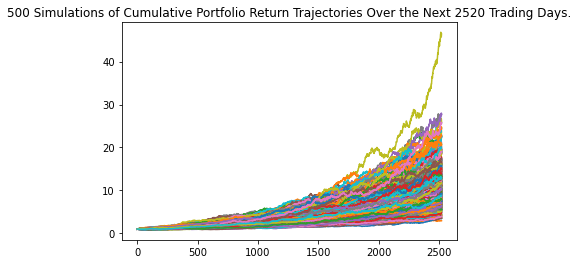

In [108]:
# Plot simulation outcomes
sim_plot = mc_portfolio.plot_simulation()

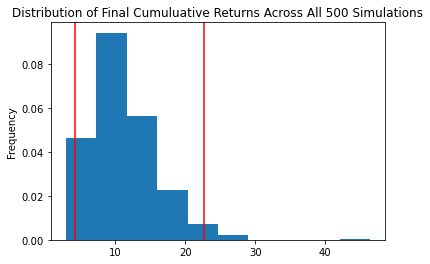

In [109]:
# Plot probability distribution and confidence intervals
dist_plot = mc_portfolio.plot_distribution()

In [110]:
# Retirement Analysis

# summary statistics for the Monte Carlo simulation
portfolio_summary = mc_portfolio.summarize_cumulative_return()

# Print summary statistics
print(portfolio_summary)

count           500.000000
mean             11.101128
std               4.806199
min               2.938077
25%               7.820897
50%              10.089193
75%              13.416582
max              46.425683
95% CI Lower      4.323409
95% CI Upper     22.617003
Name: 2520, dtype: float64


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [111]:
# Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$50,000` initial investment.

# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $50,000
portfolio_ci_lower = round(portfolio_summary[8]*50000,2)
portfolio_ci_upper = round(portfolio_summary[9]*50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $216170.47 and $1130850.14


In [ ]:
# The Monte Carlo Simulation shows that the Portfolio 1 can generate at least $216k and maximum $1.13 M over the next 10 years for clients.

In [ ]:
# Monte Carlo Simulation for conservative inverstor - 25% weights to Portfolio 1, 25% to SPY and 50% to bonds AGG

In [112]:
# Set the tickers
tickers = ['AAPL', 'AAL', 'AMZN', 'JPM', 'F', 'TWTR', 'META', 'NVDA', 'BAC', 'NOW','SPY','AGG']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio_new = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio_new

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,47.28,47.340,46.135,46.30,6744633,50163,46.542610,AAL
2017-01-04 05:00:00+00:00,46.39,47.435,46.350,46.70,5859604,36908,46.828719,AAL
2017-01-05 05:00:00+00:00,46.52,46.930,45.610,45.89,6925316,38478,46.173073,AAL
2017-01-06 05:00:00+00:00,45.85,46.720,45.470,46.21,7260197,43811,46.203536,AAL
2017-01-09 05:00:00+00:00,46.01,47.340,45.780,47.08,4739142,29086,46.905543,AAL
...,...,...,...,...,...,...,...,...
2021-12-27 05:00:00+00:00,44.21,44.920,44.130,44.33,8594926,74327,44.469436,TWTR
2021-12-28 05:00:00+00:00,44.21,44.780,43.230,43.43,8831036,76997,43.776774,TWTR
2021-12-29 05:00:00+00:00,43.17,43.550,42.560,42.76,8719359,72681,42.824685,TWTR


In [114]:
# Reorganizing the DataFrame df_portfolio

# Separate ticker data
aapl = df_portfolio_new[df_portfolio_new['symbol']=='AAPL'].drop('symbol', axis=1)
aal = df_portfolio_new[df_portfolio_new['symbol']=='AAL'].drop('symbol', axis=1)
amzn = df_portfolio_new[df_portfolio_new['symbol']=='AMZN'].drop('symbol', axis=1)
jpm = df_portfolio_new[df_portfolio_new['symbol']=='JPM'].drop('symbol', axis=1)
f = df_portfolio_new[df_portfolio_new['symbol']=='F'].drop('symbol', axis=1)
twtr = df_portfolio_new[df_portfolio_new['symbol']=='TWTR'].drop('symbol', axis=1)
meta = df_portfolio_new[df_portfolio_new['symbol']=='META'].drop('symbol', axis=1)
nvda = df_portfolio_new[df_portfolio_new['symbol']=='NVDA'].drop('symbol', axis=1)
bac = df_portfolio_new[df_portfolio_new['symbol']=='BAC'].drop('symbol', axis=1)
now = df_portfolio_new[df_portfolio_new['symbol']=='NOW'].drop('symbol', axis=1)
spy = df_portfolio_new[df_portfolio_new['symbol']=='SPY'].drop('symbol', axis=1)
agg = df_portfolio_new[df_portfolio_new['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_new = pd.concat([aapl,aal,amzn,jpm,f,twtr,meta,nvda,bac,now,spy,agg],axis=1, keys=['AAPL','AAL','AMZN','JPM','F','TWTR','META','NVDA','BAC','NOW','SPY','AGG'])

# Display sample data of concatenated Dataframe
df_portfolio_new

AAPL                                      \
                             open      high     low   close    volume   
timestamp                                                               
2017-01-03 05:00:00+00:00  115.80  116.3300  114.76  116.15  28858812   
2017-01-04 05:00:00+00:00  115.95  116.5100  115.75  116.02  21128357   
2017-01-05 05:00:00+00:00  115.90  116.8642  115.81  116.61  22193737   
2017-01-06 05:00:00+00:00  116.78  118.1600  116.47  117.91  31762830   
2017-01-09 05:00:00+00:00  117.94  119.4300  117.94  118.99  33561948   
...                           ...       ...     ...     ...       ...   
2021-12-27 05:00:00+00:00  177.10  180.4200  177.07  180.33  74912939   
2021-12-28 05:00:00+00:00  180.20  181.3300  178.53  179.29  79103863   
2021-12-29 05:00:00+00:00  179.30  180.6300  178.14  179.38  62325973   
2021-12-30 05:00:00+00:00  179.59  180.5700  178.09  178.20  59770632   
2021-12-31 05:00:00+00:00  178.00  179.2300  177.26  177.57  64038680   

                                                     AAL                  ...  \
                          trade_count        vwap   open    high     low  ...   
timestamp                                                                 ...   
2017-01-03 05:00:00+00:00      158513  115.614123  47.28  47.340  46.135  ...   
2017-01-04 05:00:00+00:00      129950  116.131882  46.39  47.435  46.350  ...   
2017-01-05 05:00:00+00:00      136222  116.461108  46.52  46.930  45.610  ...   
2017-01-06 05:00:00+00:00      177885  117.733473  45.85  46.720  45.470  ...   
2017-01-09 05:00:00+00:00      184629  118.979875  46.01  47.340  45.780  ...   
...                               ...         ...    ...     ...     ...  ...   
2021-12-27 05:00:00+00:00      629431  179.056944  17.65  18.240  17.545  ...   
2021-12-28 05:00:00+00:00      631316  179.707003  18.03  18.640  17.920  ...   
2021-12-29 05:00:00+00:00      491576  179.455692  18.41  18.430  17.990  ...   
2021-12-30 05:00:00+00:00      498613  179.374495  17.99  18.380  17.960  ...   
2021-12-31 05:00:00+00:00      451478  177.800285  18.07  18.360  17.930  ...   

                                SPY                             AGG          \
                             volume trade_count        vwap    open    high   
timestamp                                                                     
2017-01-03 05:00:00+00:00  91366522      314573  224.642686  107.73  108.22   
2017-01-04 05:00:00+00:00  78744433      259503  226.196593  108.16  108.21   
2017-01-05 05:00:00+00:00  78379012      218284  226.251697  108.37  108.68   
2017-01-06 05:00:00+00:00  71559922      235983  227.113087  108.43  108.50   
2017-01-09 05:00:00+00:00  46939676      158755  226.731966  108.54  108.54   
...                             ...         ...         ...     ...     ...   
2021-12-27 05:00:00+00:00  56689965      379426  475.278750  114.15  114.30   
2021-12-28 05:00:00+00:00  47190504      371807  477.232476  114.43  114.45   
2021-12-29 05:00:00+00:00  57439126      345000  477.233239  113.99  114.05   
2021-12-30 05:00:00+00:00  55321941      353490  477.458835  113.99  114.13   
2021-12-31 05:00:00+00:00  67846292      435210  475.661939  114.15  114.31   

                                                                              
                                low   close   volume trade_count        vwap  
timestamp                                                                     
2017-01-03 05:00:00+00:00  107.7300  108.17  5079339       18326  108.035201  
2017-01-04 05:00:00+00:00  108.0300  108.20  3297075       14047  108.123118  
2017-01-05 05:00:00+00:00  108.2201  108.65  5165933       17041  108.555340  
2017-01-06 05:00:00+00:00  108.2600  108.29  2910119       12914  108.333338  
2017-01-09 05:00:00+00:00  108.4300  108.47  3030497       11744  108.492390  
...                             ...     ...      ...         ...         ...  
2021-12-27 05:00:00+00:00  114.1300  114.26  5436338 

In [115]:
# Set number of simulations to 500 and give 25% weights to Portfolio 1, 25% to SPY and 50% to bonds AG
num_sims = 500
weights = [0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.25, 0.5]

# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
mc_portfolio_new = MCSimulation(
    portfolio_data = df_portfolio_new,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [117]:
# Run Monte Carlo simulations to forecast 10 years cumulative returns
mc_portfolio_new.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 110.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 120.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 130.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 140.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 150.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 160.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 170.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 180.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 190.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 200.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 210.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 220.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 230.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 240.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 250.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 260.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 270.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 280.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 290.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 300.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 310.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 320.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 330.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 340.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 350.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 360.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 370.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 380.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 390.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 400.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 410.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 420.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 430.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 440.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 450.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 460.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 470.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 480.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 490.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999704,1.003273,1.001319,0.998345,1.001505,1.004294,1.000014,0.998517,1.002769,0.997529,...,1.002782,1.002287,0.996455,1.010590,1.002255,1.001905,0.999827,0.993510,0.999331,1.001095
2,0.997296,1.004269,1.002394,0.996339,1.000711,1.003777,0.999930,1.003452,1.004230,0.997944,...,1.004116,0.998190,0.998087,1.011656,0.997678,0.994730,1.006506,0.997788,0.998875,1.004840
3,0.999340,1.005961,1.000564,1.007567,1.005492,1.001316,0.998158,1.001143,1.003741,1.005620,...,1.008217,0.989160,1.003235,1.013858,0.994432,0.995281,1.005552,0.998283,1.000120,1.007258
4,1.001611,1.005983,1.000794,1.006054,1.007823,1.002848,1.002763,1.002183,1.005200,0.998132,...,1.009672,0.999209,1.001478,1.010441,0.986697,0.993868,1.002915,1.002048,0.997536,1.008150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.385071,2.790848,3.193460,3.336390,2.780103,2.023028,2.646033,3.218503,2.470332,2.528151,...,2.913525,2.684037,2.742568,4.059343,3.306249,2.407202,4.261052,2.547851,3.232009,2.511812
2517,2.371493,2.796335,3.191260,3.351058,2.781454,2.032536,2.658368,3.204085,2.481286,2.541263,...,2.908309,2.674533,2.730108,4.048608,3.299220,2.411218,4.244829,2.553532,3.229600,2.518747
2518,2.363224,2.785509,3.200041,3.334505,2.791464,2.040412,2.659131,3.184726,2.466796,2.552548,...,2.904022,2.664871,2.737950,4.033249,3.279834,2.399945,4.240310,2.542845,3.248778,2.526245
2519,2.361630,2.786287,3.194798,3.359026,2.791486,2.034609,2.655989,3.187842,2.471788,2.532449,...,2.915435,2.688000,2.731363,4.022672,3.268646,2.389792,4.256119,2.555724,3.247226,2.535285


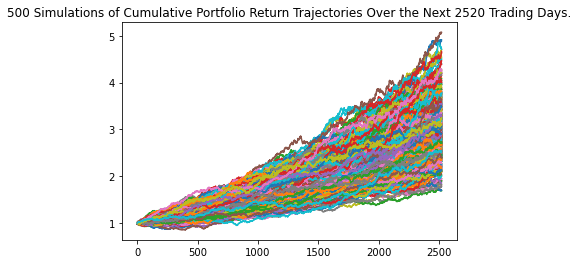

In [118]:
# Plot simulation outcomes
sim_plot = mc_portfolio_new.plot_simulation()

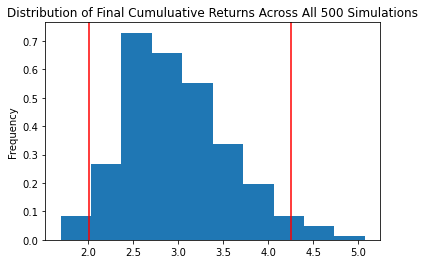

In [119]:
# Plot probability distribution and confidence intervals
dist_plot = mc_portfolio_new.plot_distribution()

In [120]:
# Retirement Analysis

# summary statistics for the Monte Carlo simulation
portfolio_summary_new = mc_portfolio_new.summarize_cumulative_return()

# Print summary statistics
print(portfolio_summary_new)

count           500.000000
mean              2.979479
std               0.585832
min               1.696095
25%               2.554470
50%               2.903669
75%               3.331850
max               5.072821
95% CI Lower      2.009555
95% CI Upper      4.256760
Name: 2520, dtype: float64


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [123]:
# Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$50,000` initial investment.

# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $50,000
portfolio_ci_lower = round(portfolio_summary_new[8]*50000,2)
portfolio_ci_upper = round(portfolio_summary_new[9]*50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $100477.73 and $212838.02


In [124]:
# The new Monte Carlo Simulation shows that the less riskirer portfolio can generate at least $100k and maximum $212 over the next 10 years for clients.
# This seems a reasonable returns for a conservative investor

In [ ]:
# Part 3 - Creating a Portfolio dashboard for clients to view the returns from various portfolios over time 

In [186]:
# yahoo url template (5 years of daily data: 2015-09-21 to 2020-09-18)
yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?period1=1442707200&period2=1600560000&interval=1d&events=history'
# get data for 10 tickers and concatenate together
tickers = ['AAPL','AMZN','NVDA','JPM','BAC','TD','PFE', 'JNJ','BNS', 'TRI','^GSPC']
df = pd.DataFrame()
for ticker in tickers:
    url = yahoo_url.format(ticker)
    df_tmp = pd.read_csv(url)
    df_tmp['Ticker'] = ticker
    df = pd.concat([df, df_tmp])
df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2015-09-21,28.417500,28.842501,28.415001,28.802500,26.335854,200888000,AAPL
1,2015-09-22,28.344999,28.545000,28.129999,28.350000,25.922108,201384800,AAPL
2,2015-09-23,28.407499,28.680000,28.325001,28.580000,26.132408,143026800,AAPL
3,2015-09-24,28.312500,28.875000,28.092501,28.750000,26.287853,200878000,AAPL
4,2015-09-25,29.110001,29.172501,28.504999,28.677500,26.221560,224607600,AAPL
...,...,...,...,...,...,...,...,...
1254,2020-09-14,3363.560059,3402.929932,3363.560059,3383.540039,3383.540039,3832130000,^GSPC
1255,2020-09-15,3407.729980,3419.479980,3389.250000,3401.199951,3401.199951,4051460000,^GSPC
1256,2020-09-16,3411.229980,3428.919922,3384.449951,3385.489990,3385.489990,4710030000,^GSPC
1257,2020-09-17,3346.860107,3375.169922,3328.820068,3357.010010,3357.010010,4371940000,^GSPC


In [187]:
# Recreate the dataframe with ticker and close price
df = df[['Date', 'Ticker', 'Adj Close']]
# Rename Columns
df.columns = ['date', 'ticker', 'price']
df

,date,ticker,price
0,2015-09-21,AAPL,26.335854
1,2015-09-22,AAPL,25.922108
2,2015-09-23,AAPL,26.132408
3,2015-09-24,AAPL,26.287853
4,2015-09-25,AAPL,26.221560
...,...,...,...
1254,2020-09-14,^GSPC,3383.540039
1255,2020-09-15,^GSPC,3401.199951
1256,2020-09-16,^GSPC,3385.489990
1257,2020-09-17,^GSPC,3357.010010


In [188]:
#Bring the tickers in columns
df_portfolio = df.pivot_table(index=['date'], columns='ticker', values=['price'])
# flatten columns multi-index, `date` will become the dataframe index
df_portfolio.columns = [col[1] for col in df_portfolio.columns.values]
df_portfolio

,AAPL,AMZN,BAC,BNS,JNJ,JPM,NVDA,PFE,TD,TRI,^GSPC
date,,,,,,,,,,,
2015-09-21,26.335854,27.419500,13.773872,32.031727,77.793045,50.570869,5.726751,23.969067,30.158396,34.618202,1966.969971
2015-09-22,25.922108,26.920000,13.659824,31.443333,77.884956,50.126465,5.570988,23.850780,29.527569,33.773453,1942.739990
2015-09-23,26.132408,26.803499,13.791421,30.912333,77.676109,49.904266,5.597760,24.116940,29.124743,33.995304,1938.760010
2015-09-24,26.287853,26.687500,13.642277,30.869293,77.250099,49.558632,5.704847,24.176083,29.139940,33.986771,1932.239990
2015-09-25,26.221560,26.212500,13.940567,31.134777,76.013817,50.587322,5.746222,23.577223,29.436357,34.020893,1931.339966
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,114.142380,155.148499,24.841913,37.963577,141.876389,96.869362,128.523117,32.926792,44.393364,75.354416,3383.540039
2020-09-15,114.320480,157.806503,24.388491,38.117455,142.392822,93.853722,129.708786,32.882309,44.273335,76.208733,3401.199951
2020-09-16,110.946465,153.904999,24.697206,37.791588,141.924194,94.250755,124.951157,32.722168,43.848598,75.461212,3385.489990


In [189]:
# compute daily returns using pandas pct_change()
df_daily_returns = df_portfolio.pct_change()
# skip first row with NA 
df_daily_returns = df_daily_returns[1:]
df_daily_returns

,AAPL,AMZN,BAC,BNS,JNJ,JPM,NVDA,PFE,TD,TRI,^GSPC
date,,,,,,,,,,,
2015-09-22,-0.015710,-0.018217,-0.008280,-0.018369,0.001181,-0.008788,-0.027199,-0.004935,-0.020917,-0.024402,-0.012318
2015-09-23,0.008113,-0.004328,0.009634,-0.016888,-0.002681,-0.004433,0.004806,0.011159,-0.013642,0.006569,-0.002049
2015-09-24,0.005948,-0.004328,-0.010814,-0.001392,-0.005484,-0.006926,0.019130,0.002452,0.000522,-0.000251,-0.003363
2015-09-25,-0.002522,-0.017799,0.021865,0.008600,-0.016004,0.020757,0.007253,-0.024771,0.010172,0.001004,-0.000466
2015-09-28,-0.019789,-0.038512,-0.026432,-0.012906,0.004066,-0.024239,-0.013130,-0.033553,-0.013684,-0.021821,-0.025666
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,0.030000,-0.004252,0.009804,-0.001191,0.003857,0.013852,0.058182,0.026060,0.001875,0.014508,0.012742
2020-09-15,0.001560,0.017132,-0.018252,0.004053,0.003640,-0.031131,0.009225,-0.001351,-0.002704,0.011337,0.005219
2020-09-16,-0.029514,-0.024723,0.012658,-0.008549,-0.003291,0.004230,-0.036679,-0.004870,-0.009594,-0.009809,-0.004619


In [190]:
# Calculate the cumulative daily returns
df_cum_daily_returns = (1 + df_daily_returns).cumprod() - 1
df_cum_daily_returns = df_cum_daily_returns.reset_index()
df_cum_daily_returns

,date,AAPL,AMZN,BAC,BNS,JNJ,JPM,NVDA,PFE,TD,TRI,^GSPC
0,2015-09-22,-0.015710,-0.018217,-0.008280,-0.018369,0.001181,-0.008788,-0.027199,-0.004935,-0.020917,-0.024402,-0.012318
1,2015-09-23,-0.007725,-0.022466,0.001274,-0.034946,-0.001503,-0.013182,-0.022524,0.006169,-0.034274,-0.017993,-0.014342
2,2015-09-24,-0.001823,-0.026696,-0.009554,-0.036290,-0.006979,-0.020016,-0.003825,0.008637,-0.033770,-0.018240,-0.017657
3,2015-09-25,-0.004340,-0.044020,0.012102,-0.028002,-0.022871,0.000325,0.003400,-0.016348,-0.023942,-0.017254,-0.018114
4,2015-09-28,-0.024043,-0.080837,-0.014650,-0.040547,-0.018898,-0.023922,-0.009775,-0.049352,-0.037298,-0.038698,-0.043315
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2020-09-14,3.334106,4.658327,0.803553,0.185187,0.823767,0.915517,21.442589,0.373720,0.472007,1.176728,0.720179
1254,2020-09-15,3.340869,4.755266,0.770634,0.189991,0.830406,0.855885,21.649629,0.371864,0.468027,1.201406,0.729157
1255,2020-09-16,3.212754,4.612976,0.793047,0.179817,0.824382,0.863736,20.818856,0.365183,0.453943,1.179813,0.721170
1256,2020-09-17,3.145503,4.486478,0.775537,0.185752,0.809260,0.842426,20.729939,0.366668,0.454556,1.168876,0.706691


In [191]:
# reset the index, moving `date` as column
df_daily_returns = df_daily_returns.reset_index()
# use `melt`
df_portfolio = df_daily_returns.melt(id_vars=['date'], var_name='ticker', value_name='daily_return')
df_portfolio

,date,ticker,daily_return
0,2015-09-22,AAPL,-0.015710
1,2015-09-23,AAPL,0.008113
2,2015-09-24,AAPL,0.005948
3,2015-09-25,AAPL,-0.002522
4,2015-09-28,AAPL,-0.019789
...,...,...,...
13833,2020-09-14,^GSPC,0.012742
13834,2020-09-15,^GSPC,0.005219
13835,2020-09-16,^GSPC,-0.004619
13836,2020-09-17,^GSPC,-0.008412


In [192]:
df_portfolio

,date,ticker,daily_return
0,2015-09-22,AAPL,-0.015710
1,2015-09-23,AAPL,0.008113
2,2015-09-24,AAPL,0.005948
3,2015-09-25,AAPL,-0.002522
4,2015-09-28,AAPL,-0.019789
...,...,...,...
13833,2020-09-14,^GSPC,0.012742
13834,2020-09-15,^GSPC,0.005219
13835,2020-09-16,^GSPC,-0.004619
13836,2020-09-17,^GSPC,-0.008412


In [193]:
# Create a interactive dashboard using hvplot for daily returns of stocks
df_portfolio_plot = df_portfolio.hvplot.line(x="date",y="daily_return",groupby="ticker",label="Daily Return of portfolios").opts(xlabel='Date',ylabel='Daily Return')
df_portfolio_plot

:DynamicMap   [ticker]
   :Curve   [date]   (daily_return)

In [194]:
# Create a dataframe which separates the stocks by Sectors
# Define a function to store Sector value
def f(row):  
    if row['ticker'] in ['AAPL', 'AMZN','NVDA']:
        val = 'Technology'
    elif row['ticker'] in ['JPM','BAC','TD']:
        val = 'Financials'
    elif row['ticker'] in ['PFE', 'JNJ','BNS', 'TRI']:
        val = 'Healthcare'
    else:
        val = 'SPY'
    return val

#create new column 'Sector' using the function above
df_portfolio['Sector'] = df_portfolio.apply(f, axis=1)

In [195]:
df_portfolio

,date,ticker,daily_return,Sector
0,2015-09-22,AAPL,-0.015710,Technology
1,2015-09-23,AAPL,0.008113,Technology
2,2015-09-24,AAPL,0.005948,Technology
3,2015-09-25,AAPL,-0.002522,Technology
4,2015-09-28,AAPL,-0.019789,Technology
...,...,...,...,...
13833,2020-09-14,^GSPC,0.012742,SPY
13834,2020-09-15,^GSPC,0.005219,SPY
13835,2020-09-16,^GSPC,-0.004619,SPY
13836,2020-09-17,^GSPC,-0.008412,SPY


In [196]:
# Create a interactive dashboard using hvplot for daily returns of stocks by Sectors
df_portfolio_plot1 = df_portfolio.hvplot.line(x="date",y="daily_return",groupby="Sector",label="Daily Return of portfolios").opts(xlabel='Date',ylabel='Daily Return')
df_portfolio_plot1

:DynamicMap   [Sector]
   :Curve   [date]   (daily_return)

In [ ]:
# The above Hvplot shows that Technology Sector returns were much larger than the other 2 sectors and overall market.

In [197]:

df_cum_daily_returns

,date,AAPL,AMZN,BAC,BNS,JNJ,JPM,NVDA,PFE,TD,TRI,^GSPC
0,2015-09-22,-0.015710,-0.018217,-0.008280,-0.018369,0.001181,-0.008788,-0.027199,-0.004935,-0.020917,-0.024402,-0.012318
1,2015-09-23,-0.007725,-0.022466,0.001274,-0.034946,-0.001503,-0.013182,-0.022524,0.006169,-0.034274,-0.017993,-0.014342
2,2015-09-24,-0.001823,-0.026696,-0.009554,-0.036290,-0.006979,-0.020016,-0.003825,0.008637,-0.033770,-0.018240,-0.017657
3,2015-09-25,-0.004340,-0.044020,0.012102,-0.028002,-0.022871,0.000325,0.003400,-0.016348,-0.023942,-0.017254,-0.018114
4,2015-09-28,-0.024043,-0.080837,-0.014650,-0.040547,-0.018898,-0.023922,-0.009775,-0.049352,-0.037298,-0.038698,-0.043315
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2020-09-14,3.334106,4.658327,0.803553,0.185187,0.823767,0.915517,21.442589,0.373720,0.472007,1.176728,0.720179
1254,2020-09-15,3.340869,4.755266,0.770634,0.189991,0.830406,0.855885,21.649629,0.371864,0.468027,1.201406,0.729157
1255,2020-09-16,3.212754,4.612976,0.793047,0.179817,0.824382,0.863736,20.818856,0.365183,0.453943,1.179813,0.721170
1256,2020-09-17,3.145503,4.486478,0.775537,0.185752,0.809260,0.842426,20.729939,0.366668,0.454556,1.168876,0.706691


In [198]:
# Dashbpard for Cumulative returns

# reset the index, moving `date` as column
df_cum_daily_returns = df_cum_daily_returns.set_index('date')
df_cum_daily_returns

,AAPL,AMZN,BAC,BNS,JNJ,JPM,NVDA,PFE,TD,TRI,^GSPC
date,,,,,,,,,,,
2015-09-22,-0.015710,-0.018217,-0.008280,-0.018369,0.001181,-0.008788,-0.027199,-0.004935,-0.020917,-0.024402,-0.012318
2015-09-23,-0.007725,-0.022466,0.001274,-0.034946,-0.001503,-0.013182,-0.022524,0.006169,-0.034274,-0.017993,-0.014342
2015-09-24,-0.001823,-0.026696,-0.009554,-0.036290,-0.006979,-0.020016,-0.003825,0.008637,-0.033770,-0.018240,-0.017657
2015-09-25,-0.004340,-0.044020,0.012102,-0.028002,-0.022871,0.000325,0.003400,-0.016348,-0.023942,-0.017254,-0.018114
2015-09-28,-0.024043,-0.080837,-0.014650,-0.040547,-0.018898,-0.023922,-0.009775,-0.049352,-0.037298,-0.038698,-0.043315
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,3.334106,4.658327,0.803553,0.185187,0.823767,0.915517,21.442589,0.373720,0.472007,1.176728,0.720179
2020-09-15,3.340869,4.755266,0.770634,0.189991,0.830406,0.855885,21.649629,0.371864,0.468027,1.201406,0.729157
2020-09-16,3.212754,4.612976,0.793047,0.179817,0.824382,0.863736,20.818856,0.365183,0.453943,1.179813,0.721170


In [199]:
# reset the index, moving `date` as column
df_cum_daily_returns = df_cum_daily_returns.reset_index()
# use `melt`
df_portfolio_cum = df_cum_daily_returns.melt(id_vars=['date'], var_name='ticker', value_name='cum_return')
df_portfolio_cum

,date,ticker,cum_return
0,2015-09-22,AAPL,-0.015710
1,2015-09-23,AAPL,-0.007725
2,2015-09-24,AAPL,-0.001823
3,2015-09-25,AAPL,-0.004340
4,2015-09-28,AAPL,-0.024043
...,...,...,...
13833,2020-09-14,^GSPC,0.720179
13834,2020-09-15,^GSPC,0.729157
13835,2020-09-16,^GSPC,0.721170
13836,2020-09-17,^GSPC,0.706691


In [200]:
# Create a interactive dashboard using hvplot for cumulative returns of stocks
df_portfolio_plot_cum = df_portfolio_cum.hvplot.line(x="date",y="cum_return",groupby="ticker",label="Cumulative Return of portfolios").opts(xlabel='Date',ylabel='Cumulative Return')
df_portfolio_plot_cum

:DynamicMap   [ticker]
   :Curve   [date]   (cum_return)

In [204]:
# Creating a risk return plot using std dev
portfolio_std_dev = df_portfolio.rolling(window=21).std()
portfolio_std_dev

C:\Users\panka\AppData\Local\Temp\ipykernel_23460\2200672932.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Sector', 'date', 'ticker'], dtype='object')
  portfolio_std_dev = df_portfolio.rolling(window=21).std()


,daily_return
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
13833,0.013350
13834,0.013393
13835,0.013428
13836,0.013545


In [206]:
# Rename the Columns
portfolio_std_dev.columns = ['Std. dev']

In [207]:
portfolio_std_dev

,Std. dev
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
13833,0.013350
13834,0.013393
13835,0.013428
13836,0.013545


In [208]:
# Add Standard deviation to df_portfolio
df_portfolio_std = pd.concat([df_portfolio, portfolio_std_dev], axis="columns", join="inner")

In [209]:
df_portfolio_std

,date,ticker,daily_return,Sector,Std. dev
0,2015-09-22,AAPL,-0.015710,Technology,NaN
1,2015-09-23,AAPL,0.008113,Technology,NaN
2,2015-09-24,AAPL,0.005948,Technology,NaN
3,2015-09-25,AAPL,-0.002522,Technology,NaN
4,2015-09-28,AAPL,-0.019789,Technology,NaN
...,...,...,...,...,...
13833,2020-09-14,^GSPC,0.012742,SPY,0.013350
13834,2020-09-15,^GSPC,0.005219,SPY,0.013393
13835,2020-09-16,^GSPC,-0.004619,SPY,0.013428
13836,2020-09-17,^GSPC,-0.008412,SPY,0.013545


In [216]:
# Create a interactive dashboard using hvplot scatter for risk and return by ticker
df_portfolio_std_plot = df_portfolio_std.hvplot.scatter(x="Std. dev",y="daily_return",groupby="ticker",label="Risk Return of portfolios").opts(xlabel='Risk',ylabel='Daily Return')
df_portfolio_std_plot

:DynamicMap   [ticker]
   :Scatter   [Std. dev]   (daily_return)

In [217]:
# Create a interactive dashboard using hvplot scatter for risk and return by Sector
df_portfolio_std_plot_1 = df_portfolio_std.hvplot.scatter(x="Std. dev",y="daily_return",groupby="Sector",label="Risk Return of portfolios").opts(xlabel='Risk',ylabel='Daily Return')
df_portfolio_std_plot_1

:DynamicMap   [Sector]
   :Scatter   [Std. dev]   (daily_return)

In [ ]:
# The 5 different hvplots would help a investor to determine the stocks to choose based on risk appetite and returns associated with them.

# A younger investor would like to create a portfolio of stocks weighing more in technology, wherease a conservative investor might go with the SPY index funds.